
# WeightWatcher - SVDSmoothing

### Example of SVDSmoothing using the VGG16 model 

Compare the original (green) vs. smoothed (red) ESDs



In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import numpy as np
import pandas as pd

import tensorflow
import torchvision.models as models
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher

set custom Logging at WARN Level

In [3]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)


In [4]:
import weightwatcher as ww
logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.INFO)

ww.__version__

'0.5'

### PyTorch Example

VGG16 has 16 layers

- The last 3 are dense

In [5]:
vgg16_pt = models.vgg16(pretrained=True)
watcher = ww.WeightWatcher(model=vgg16_pt)
details = watcher.describe()

INFO:weightwatcher:

python      version 3.9.5 (default, May 18 2021, 12:31:01) 
[Clang 10.0.0 ]
numpy       version 1.19.5
tensforflow version 2.5.0
keras       version 2.5.0
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img


In [6]:
details

,layer_id,name,M,N,layer_type,num_evals,rf
0,2,None,3.0,64.0,LAYER_TYPE.CONV2D,27.0,9.0
1,4,None,64.0,64.0,LAYER_TYPE.CONV2D,576.0,9.0
2,7,None,64.0,128.0,LAYER_TYPE.CONV2D,576.0,9.0
3,9,None,128.0,128.0,LAYER_TYPE.CONV2D,1152.0,9.0
4,12,None,128.0,256.0,LAYER_TYPE.CONV2D,1152.0,9.0
5,14,None,256.0,256.0,LAYER_TYPE.CONV2D,2304.0,9.0
6,16,None,256.0,256.0,LAYER_TYPE.CONV2D,2304.0,9.0
7,19,None,256.0,512.0,LAYER_TYPE.CONV2D,2304.0,9.0
8,21,None,512.0,512.0,LAYER_TYPE.CONV2D,4608.0,9.0
9,23,None,512.0,512.0,LAYER_TYPE.CONV2D,4608.0,9.0


In [7]:
all_esds = []
for layer_id in details.layer_id.to_numpy():
    print(layer_id)
    esd = watcher.get_ESD(layer=layer_id) 
    all_esds.append(esd)
    #plt.hist(np.log10(esd[esd>0.0]), bins=100, color='green', label='vgg16', alpha=0.5);

    #plt.title("Layer {}, VGG16".format(layer_id))
    #plt.xlabel(r"$log_{10} \lambda $ Log 10 Eigenvalues")
    #plt.legend()
    #plt.show()
    


INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img


2


INFO:weightwatcher:Filtering layer by id 2
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:keeping layer 2 None by id
INFO:weightwatcher:Getting ESD for layer 2 
INFO:weightwatcher:Found 27 eiganvalues for 2 None
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
I

4


INFO:weightwatcher:Filtering layer by id 4
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:keeping layer 4 None by id
INFO:weightwatcher:Getting ESD for layer 4 
INFO:weightwatcher:Found 576 eiganvalues for 4 None
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'w

7


INFO:weightwatcher:Filtering layer by id 7
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:keeping layer 7 None by id
INFO:weightwatcher:Getting ESD for layer 7 
INFO:weightwatcher:Found 576 eiganvalues for 7 None
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': 

9


INFO:weightwatcher:Filtering layer by id 9
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:keeping layer 9 None by id
INFO:weightwatcher:Getting ESD for layer 9 
INFO:weightwatcher:Found 1152 eiganvalues for 9 None
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:we

12


INFO:weightwatcher:Filtering layer by id 12
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:keeping layer 12 None by id
INFO:weightwatcher:Getting ESD for layer 12 
INFO:weightwatcher:Found 1152 eiganvalues for 12 None
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww

14


INFO:weightwatcher:Filtering layer by id 14
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:keeping layer 14 None by id
INFO:weightwatcher:Getting ESD for layer 14 
INFO:weightwatcher:Found 2304 eiganvalues for 14 None
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img

16


INFO:weightwatcher:Filtering layer by id 16
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:keeping layer 16 None by id
INFO:weightwatcher:Getting ESD for layer 16 
INFO:weightwatcher:Found 2304 eiganvalues for 16 None
INFO:weightwatcher:params {'glorot_fix': False, 'nor

19


INFO:weightwatcher:Filtering layer by id 19
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:keeping layer 19 None by id
INFO:we

21


INFO:weightwatcher:Filtering layer by id 21
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

23


INFO:weightwatcher:Filtering layer by id 23
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

26


INFO:weightwatcher:Filtering layer by id 26
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

28


INFO:weightwatcher:Filtering layer by id 28
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

30


INFO:weightwatcher:Filtering layer by id 30
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

35


INFO:weightwatcher:Filtering layer by id 35
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

38


INFO:weightwatcher:Filtering layer by id 38
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

41


INFO:weightwatcher:Filtering layer by id 41
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

In [8]:
smoother_vgg16 = watcher.SVDSmoothing(percent=0.2)

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:LAYER: 2 16  : <class 'torch.nn.modules.conv.Conv2d'>
INFO:weightwatcher:apply truncated SVD on Layer 2 None, with nsmooth=5,  keeping ncomp=5 out of 3. of the singular vectors
INFO:weightwatcher:LAYER TYPE  16 ou

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


2


INFO:weightwatcher:Filtering layer by id 2
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:keeping layer 2 None by id
INFO:weightwatcher:Getting ESD for layer 2 
INFO:weightwatcher:Found 27 eiganvalues for 2 None


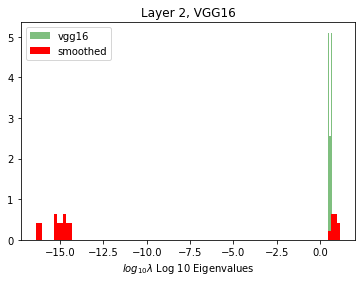

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


4


INFO:weightwatcher:Filtering layer by id 4
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:keeping layer 4 None by id
INFO:weightwatcher:Getting ESD for layer 4 
INFO:weightwatcher:Found 576 eiganvalues for 4 None


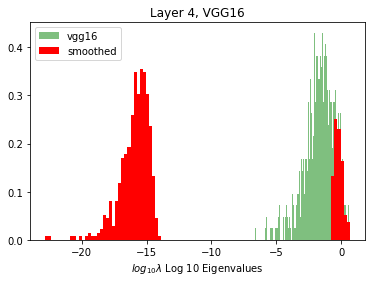

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


7


INFO:weightwatcher:Filtering layer by id 7
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:keeping layer 7 None by id
INFO:weightwatcher:Getting ESD for layer 7 
INFO:weightwatcher:Found 576 eiganvalues for 7 None


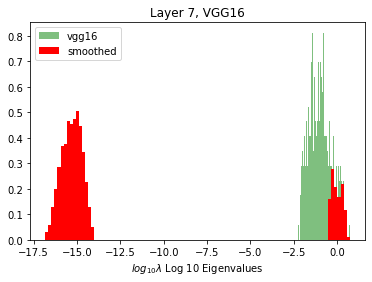

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


9


INFO:weightwatcher:Filtering layer by id 9
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:keeping layer 9 None by id
INFO:weightwatcher:Getting ESD for layer 9 
INFO:weightwatcher:Found 1152 eiganvalues for 9 None


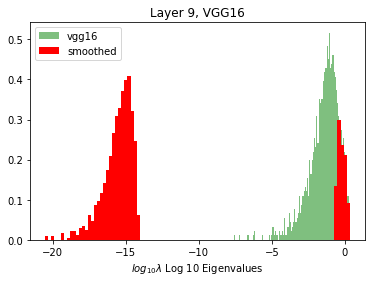

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


12


INFO:weightwatcher:Filtering layer by id 12
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:keeping layer 12 None by id
INFO:weightwatcher:Getting ESD for layer 12 
INFO:weightwatcher:Found 1152 eiganvalues for 12 None


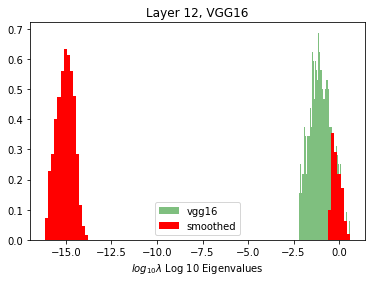

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


14


INFO:weightwatcher:Filtering layer by id 14
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:keeping layer 14 None by id
INFO:weightwatcher:Getting ESD for layer 14 
INFO:weightwatcher:Found 2304 eiganvalues for 14 None


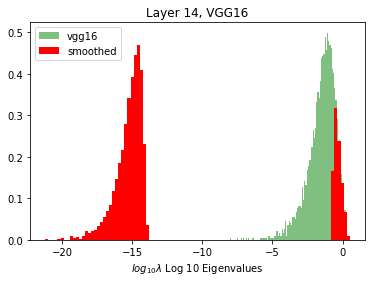

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


16


INFO:weightwatcher:Filtering layer by id 16
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:keeping layer 16 None by id
INFO:weightwatcher:Getting ESD for layer 16 
INFO:weightwatcher:Found 2304 eiganvalues for 16 None


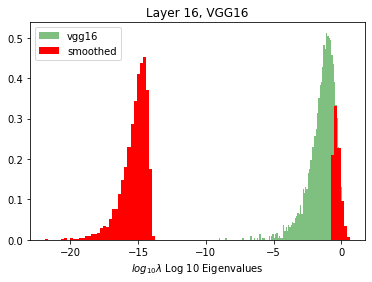

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


19


INFO:weightwatcher:Filtering layer by id 19
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:keeping layer 19 None by id
INFO:we

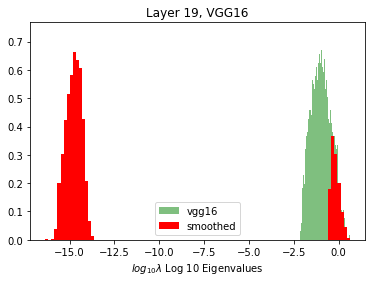

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


21


INFO:weightwatcher:Filtering layer by id 21
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

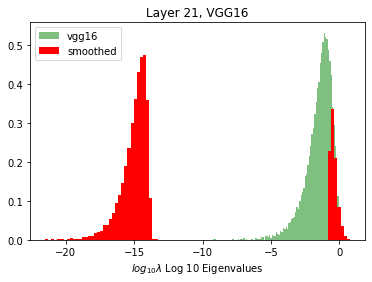

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


23


INFO:weightwatcher:Filtering layer by id 23
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

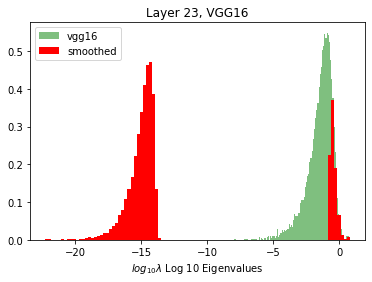

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


26


INFO:weightwatcher:Filtering layer by id 26
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

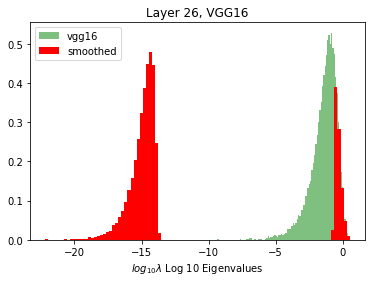

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


28


INFO:weightwatcher:Filtering layer by id 28
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

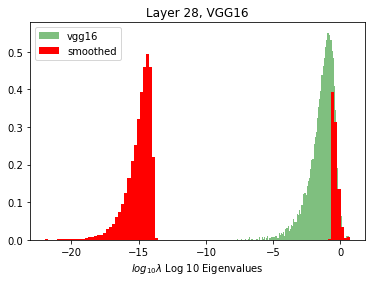

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


30


INFO:weightwatcher:Filtering layer by id 30
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

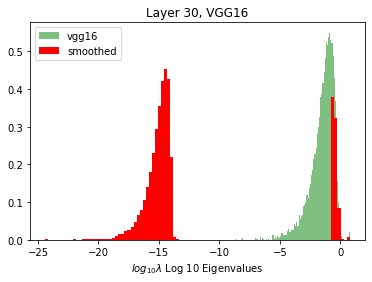

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


35


INFO:weightwatcher:Filtering layer by id 35
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

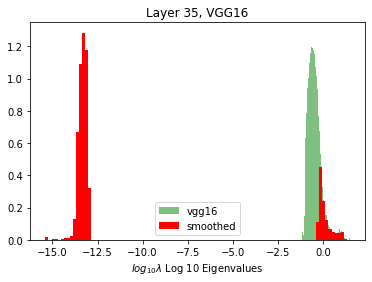

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


38


INFO:weightwatcher:Filtering layer by id 38
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

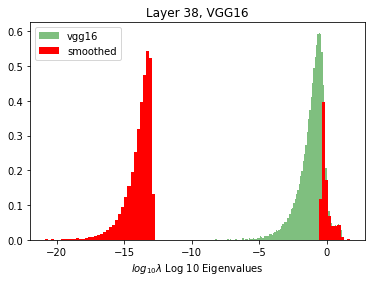

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [], 'num_smooth': 200}
INFO:weightwatcher:Saving all images to ww-img


41


INFO:weightwatcher:Filtering layer by id 41
INFO:weightwatcher:skipping layer 0 None by id
INFO:weightwatcher:skipping layer 1 None by id
INFO:weightwatcher:skipping layer 2 None by id
INFO:weightwatcher:skipping layer 3 None by id
INFO:weightwatcher:skipping layer 4 None by id
INFO:weightwatcher:skipping layer 5 None by id
INFO:weightwatcher:skipping layer 6 None by id
INFO:weightwatcher:skipping layer 7 None by id
INFO:weightwatcher:skipping layer 8 None by id
INFO:weightwatcher:skipping layer 9 None by id
INFO:weightwatcher:skipping layer 10 None by id
INFO:weightwatcher:skipping layer 11 None by id
INFO:weightwatcher:skipping layer 12 None by id
INFO:weightwatcher:skipping layer 13 None by id
INFO:weightwatcher:skipping layer 14 None by id
INFO:weightwatcher:skipping layer 15 None by id
INFO:weightwatcher:skipping layer 16 None by id
INFO:weightwatcher:skipping layer 17 None by id
INFO:weightwatcher:skipping layer 18 None by id
INFO:weightwatcher:skipping layer 19 None by id
INFO:w

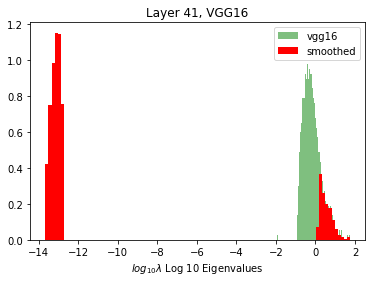

In [9]:

for iesd, layer_id in enumerate(details.layer_id.to_numpy()):
    print(layer_id)
    esd = all_esds[iesd]
    smoothed_esd = watcher.get_ESD(model=smoother_vgg16, layer=layer_id) 
    plt.hist(np.log10(esd[esd>0.0]), bins=100, color='green', label='vgg16', alpha=0.5, density=True);
    plt.hist(np.log10(smoothed_esd[smoothed_esd>0.0]), bins=100, color='red', label='smoothed', density=True);

    plt.title("Layer {}, VGG16".format(layer_id))
    plt.xlabel(r"$log_{10} \lambda $ Log 10 Eigenvalues")
    plt.legend()
    plt.show()